# **CS210 - Term Project: Personal Health Data Analysis**
#
### ***MEHMET YILDIRGAN***                                                                                                                                            
#### ***JANUARY 19TH, 2024***


### **INTRODUCTION**

In this project, I analyzed more than 220,000 lines of my own health data recorded by Mi Band 4 from August 2020 to May 2023. The dataset includes detailed measurements such as daily step count (day-to-day and minute-to-minute), sleep duration, and deep and shallow sleep time. This report contains the results of detailed analysis on the dataset. The dataset and associated python notebook are available from the link: https://github.com/myildirgann/CS_210.git

---

***THE DATA SOURCE***

Mi Fit Health Tracker App & Mi Band 4

---

***DATA ANALYSIS TECHNIQUES***

EDA (Exploratory Data Analysis) technique is used to explore the structure of the dataset. Data preprocessing techniques such as data imputation, are applied to ensure the quality and completeness of the dataset. Correlation analysis is employed to examine the relationships between activity and sleep parameters. Finally, visualization techniques, such as bar charts with gradient colors, are used to visually represent and interpret complex data parameters.

---

***MOTIVATION & AIM***

The aim of this project is to analyze personal health data and make inferences about the results using data analysis techniques such as Exploratory Data Analysis (EDA). The motivation for working on personal health data is to learn more about my sleep and activity patterns during the day. Because the dataset provides extensive data covering more than 900 days, it is easy to make robust and unbiased inferences about the results.

---

***CONTENT OF DATA***

Step:
1. day by day step count,
2. minute to minute activity,
3. total distance and running distance,
4. calories burned during activities

Sleep:
1. day by day sleep time,
2. deep sleep time,
3. shallow sleep time

In [21]:
#LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
#READING THE DATASETS

df_activity = pd.read_csv("ACTIVITY.csv")
df_activity_stage = pd.read_csv("ACTIVITY_STAGE.csv")
df_activity_minute = pd.read_csv("ACTIVITY_MINUTE.csv")
df_sleep = pd.read_csv("SLEEP.csv")

In [23]:
#PREPROCESSING

# Fill missing values with the mean of each column
df_activity["steps"].fillna(df_activity["steps"].mean(), inplace=True)
df_activity["distance"].fillna(df_activity["distance"].mean(), inplace=True)
df_activity["runDistance"].fillna(df_activity["runDistance"].mean(), inplace=True)
df_activity["calories"].fillna(df_activity["calories"].mean(), inplace=True)

df_sleep["deepSleepTime"].fillna(df_sleep["deepSleepTime"].mean(), inplace=True)
df_sleep["shallowSleepTime"].fillna(df_sleep["shallowSleepTime"].mean(), inplace=True)

#create a new column on sleep dataframe
df_sleep['totalSleep'] = df_sleep['deepSleepTime'] + df_sleep['shallowSleepTime']

# Merge ACTIVITY and SLEEP datasets based on the 'date' column
df_merged = pd.merge(df_activity, df_sleep, on='date', how='inner')

## **PART 1: HYPOTHESIS TESTING**

1. **Hypothesis 1: The More Active Day Leads to the More Total Sleep Duration**
   - Null Hypothesis (H0): There is a significant correlation between the number of steps taken in a day and the total sleep duration.
   - Alternative Hypothesis (H1): There is not a positive correlation between the number of steps taken in a day and the total sleep duration.

2. **Hypothesis 2: Active Days Result in More Calory Burning**
   - Null Hypothesis (H0): The level of activity (measured by steps) is associated with the calories burned during the activies.
   - Alternative Hypothesis (H1): More active days (higher step count) are not associated with more calory burn.

3. **Hypothesis 3: Total Sleep Duration Affects the Sleep Quality**
   - Null Hypothesis (H0): There is a significant relationship between the total sleep duration and sleep quality (measured by deep sleep duration).
   - Alternative Hypothesis (H1): Better sleep quality is not associated with a total sleep time.

### **1.1: CORRELATION HEATMAP**

To reach a comprehensive intuition about the parameters correlation heatmap is used below.

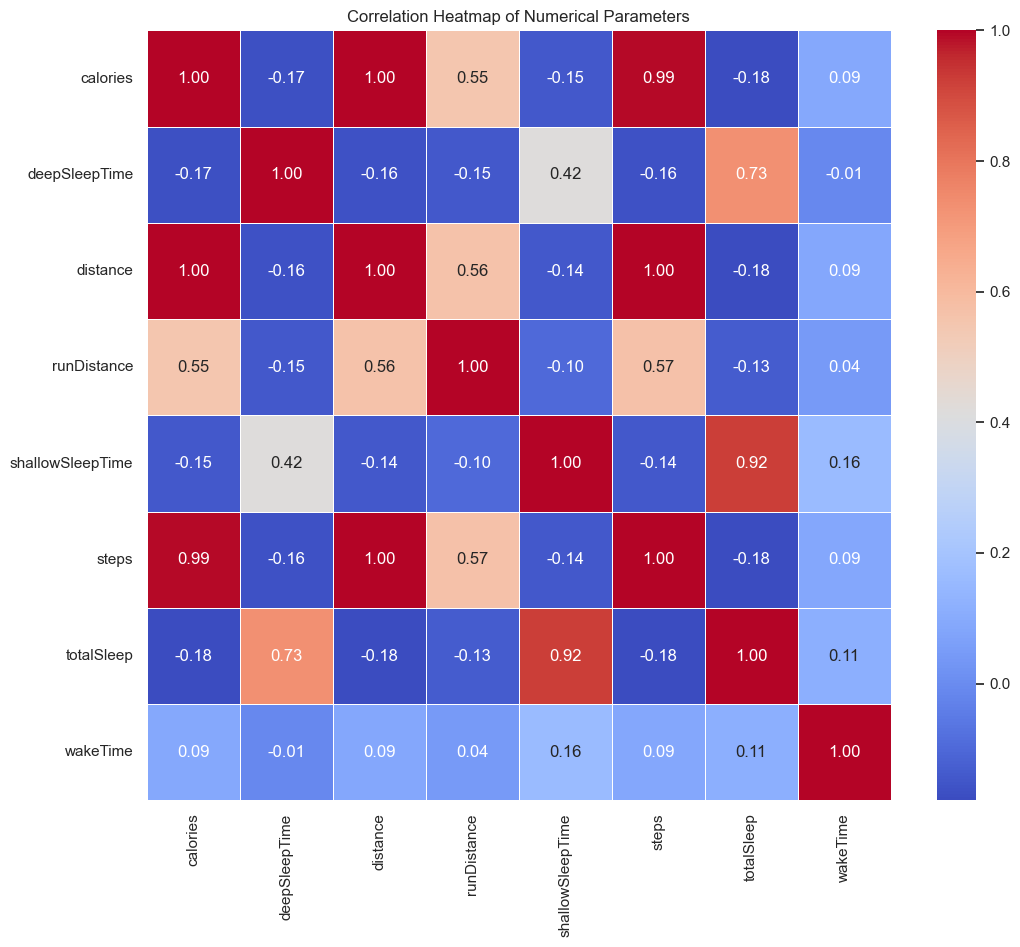

In [24]:
#CORRELATION MAP OF PARAMETERS

# Select numerical columns
numerical_columns = df_merged.select_dtypes(include=['int64', 'float64']).columns

# Exclude specific columns
exclude_columns = ["date", "start", "stop", "REMTime", "naps"]

# Create a new DataFrame with only numerical columns and excluding specific columns
df_numerical = df_merged[numerical_columns.difference(exclude_columns)]

# Calculate the correlation matrix
correlation_matrix_numerical = df_numerical.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix_numerical, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Set the title of the plot
plt.title('Correlation Heatmap of Numerical Parameters')

# Show the plot
plt.show()

***From the correlation heatmap we have the following conclusion(s):***
#

1. There is a strong correlation between "distance" and "calories".
2. There is a strong correlation between "steps" and "distance".
3. There is a relatively strong correlation between "total sleep time" and "shallow sleep time". Additionally, “deep sleep duration” is also correlated with “total sleep duration,” although it is not as strongly correlated as “shallow sleep time”.


---
### **1.2: SCATTER PLOTS**

#### **1.2.1 Hypothesis 1: The More Active Day Leads to the More Total Duration**
   - Null Hypothesis (H0): There is a significant correlation between the number of steps taken in a day and the total sleep duration.
   - Alternative Hypothesis (H1): There is not a positive correlation between the number of steps taken in a day and the total sleep duration.


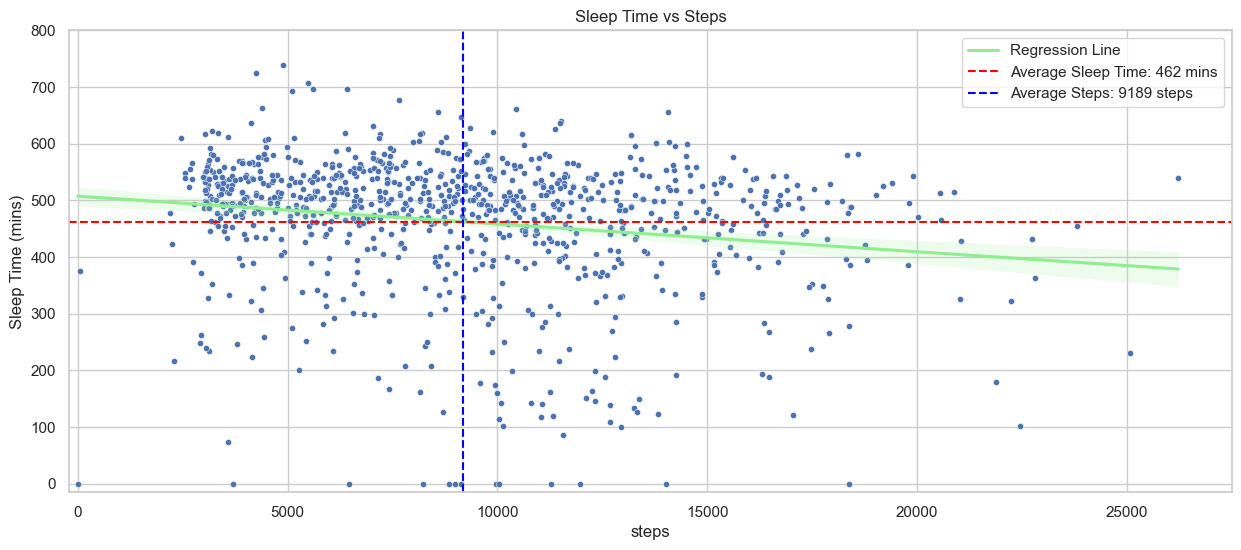

Correlation Coefficient between 'Steps' and 'Sleep Time': -0.17706


In [25]:
df_sleep = pd.read_csv("SLEEP.csv")[1:]

#create a new column on sleep dataframe
df_sleep['totalSleep'] = df_sleep['deepSleepTime'] + df_sleep['shallowSleepTime']

# Merge ACTIVITY and SLEEP datasets based on the 'date' column
df_merged = pd.merge(df_activity, df_sleep, on='date', how='inner')


#Steps vs totalSleep

mean_steps = df_merged['steps'].mean()
mean_totalSleep = df_merged['totalSleep'][1:].mean()

# Plot a scatter plot to visualize the relationship between steps and total sleep
plt.figure(figsize=(15, 6))

# Scatter plot
sns.scatterplot(x='steps', y='totalSleep', data=df_merged, s=20)

# Add a regression line with a paler color
sns.regplot(x='steps', y='totalSleep', data=df_merged, scatter=False, line_kws={'color': 'lightgreen'}, label='Regression Line')

# Mean lines
plt.axhline(mean_totalSleep, color='red', linestyle='--', label=f'Average Sleep Time: {mean_totalSleep:.0f} mins')
plt.axvline(mean_steps, color='blue', linestyle='--', label=f'Average Steps: {mean_steps:.0f} steps')

# Set x-axis and y-axis limits to include zero
plt.xlim(-200, 27500)
plt.ylim(-15, 800)

plt.title('Sleep Time vs Steps')
plt.xlabel('steps')
plt.ylabel('Sleep Time (mins)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the correlation coefficient between steps and total sleep duration
correlation_coefficient = df_merged['steps'].corr(df_merged['totalSleep'])
print(f"Correlation Coefficient between 'Steps' and 'Sleep Time': {correlation_coefficient:.5f}")

***From the scatter plot (above) we have the following conclusion(s):***
#
1. There is not a strong corelation between sleep time and steps taken during the day. In this case, we need to reject Null Hypothesis (H0).
#
**Note:**
Since my initial hypothesis and motivation to start this project is to investigate the relationship between the sleep and activity patterns, I put the scatter plot of "sleep" vs "steps", here. One remark is, since my hypothesis was "the more active I am in day, I sleep more", I used the following day's sleep data to compare with the activity of each day. However, the results show that there is not a strong corelation between sleep time and physical activity, directly. (The reason that drives me to produce the hypothesis is also explained in Part 2.2.2)

---
#### **1.2.2 Hypothesis 2: Active Days Result in More Calory Burning**
   - Null Hypothesis (H0): The level of activity (measured by steps) is associated with the calories burned during the activies.
   - Alternative Hypothesis (H1): More active days (higher step count) are not associated with more calory burn.

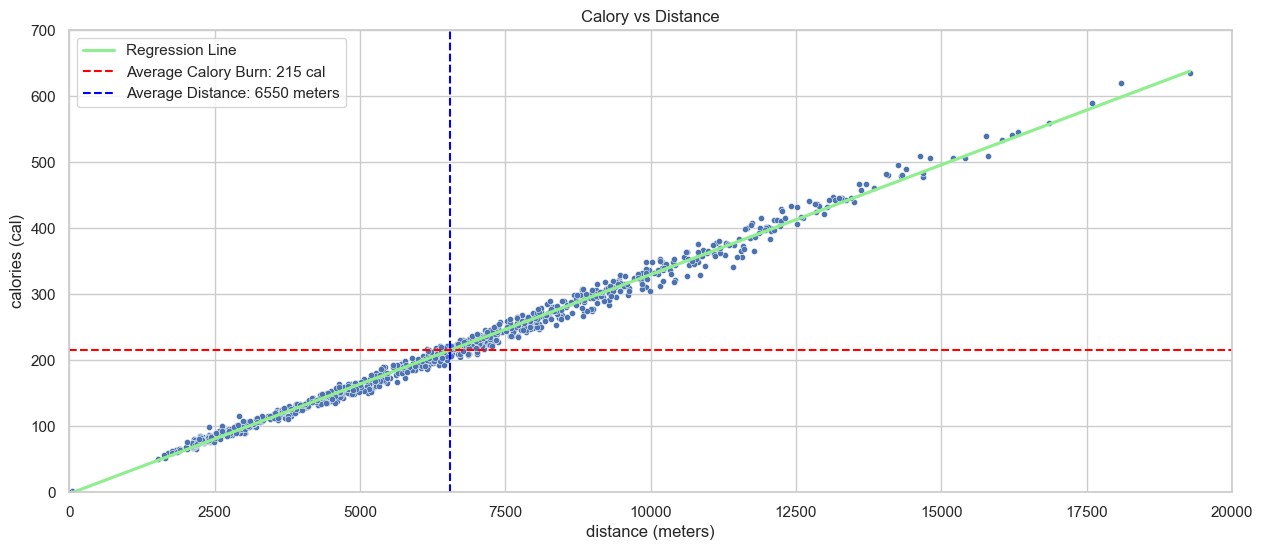

Correlation Coefficient between 'Calory' burned during activities and 'Distance' taken: 0.99692


In [26]:
#CALORY vs DISTANCE

#read the .csv file again to avoid misinterpretations
df_sleep = pd.read_csv("SLEEP.csv")

mean_calories = df_merged['calories'].mean()
mean_distance = df_merged['distance'].mean()

# Plot a scatter plot to visualize the relationship between steps and total sleep
plt.figure(figsize=(15, 6))

# Scatter plot
sns.scatterplot(x='distance', y='calories', data=df_merged, s=20)

# Add a regression line with a paler color
sns.regplot(x='distance', y='calories', data=df_merged, scatter=False, line_kws={'color': 'lightgreen'}, label='Regression Line')

# Mean lines
plt.axhline(mean_calories, color='red', linestyle='--', label=f'Average Calory Burn: {mean_calories:.0f} cal')
plt.axvline(mean_distance, color='blue', linestyle='--', label=f'Average Distance: {mean_distance:.0f} meters')

# Set x-axis and y-axis limits to include zero
plt.xlim(0, 20000)
plt.ylim(0, 700)

plt.title('Calory vs Distance')
plt.xlabel('distance (meters)')
plt.ylabel('calories (cal)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the correlation coefficient between steps and total sleep duration
correlation_coefficient = df_merged['calories'].corr(df_merged['distance'])
print(f"Correlation Coefficient between 'Calory' burned during activities and 'Distance' taken: {correlation_coefficient:.5f}")

***From the scatter plot (above) we have the following conclusion(s):***
#
1. There is a strong correlation between "calories" and "distance".
2. Correlation coeffiicient between "calories" and "distance" is 0.997.

---
#### **1.2.3 Hypothesis 3: Total Sleep Duration Affects the Sleep Quality**
   - Null Hypothesis (H0): There is a significant relationship between the total sleep duration and sleep quality (measured by deep sleep duration).
   - Alternative Hypothesis (H1): Better sleep quality is not associated with a total sleep time.

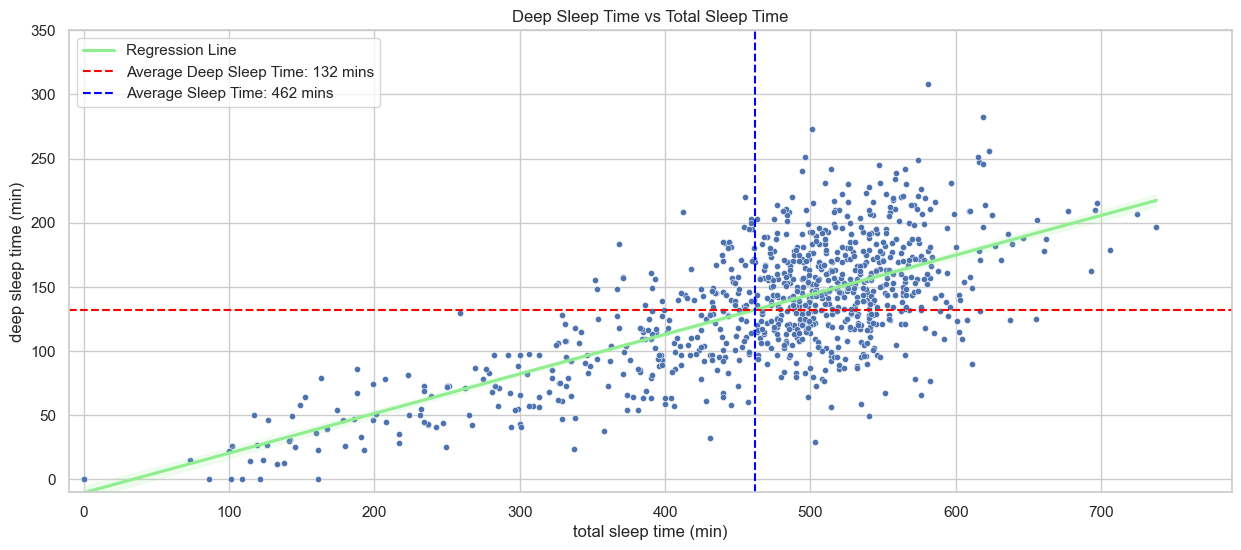

Correlation Coefficient between Deep Sleep Time and Sleep Time: 0.73242


In [27]:
#DEEP SLEEP TIME vs TOTAL SLEEP TIME


mean_deep_sleep_time = df_merged['deepSleepTime'].mean()
mean_sleep_time = df_merged['totalSleep'].mean()

# Plot a scatter plot to visualize the relationship between steps and total sleep
plt.figure(figsize=(15, 6))

# Scatter plot
sns.scatterplot(x='totalSleep', y='deepSleepTime', data=df_merged, s=20)

# Add a regression line with a paler color
sns.regplot(x='totalSleep', y='deepSleepTime', data=df_merged, scatter=False, line_kws={'color': 'lightgreen'}, label='Regression Line')


# Mean lines
plt.axhline(mean_deep_sleep_time, color='red', linestyle='--', label=f'Average Deep Sleep Time: {mean_deep_sleep_time:.0f} mins')
plt.axvline(mean_sleep_time, color='blue', linestyle='--', label=f'Average Sleep Time: {mean_sleep_time:.0f} mins')

# Set x-axis and y-axis limits to include zero
plt.xlim(-10, 790)
plt.ylim(-10, 350)


plt.title('Deep Sleep Time vs Total Sleep Time')
plt.xlabel('total sleep time (min)')
plt.ylabel('deep sleep time (min)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the correlation coefficient between steps and total sleep duration
correlation_coefficient = df_merged['deepSleepTime'].corr(df_merged['totalSleep'])
print(f"Correlation Coefficient between Deep Sleep Time and Sleep Time: {correlation_coefficient:.5f}")

***From the scatter plot (above) we have the following conclusion(s):***
#
1. There is a relatively strong correlation between "deep sleep time" and "total sleep time". In this case, we can carefully accept the Null Hypothesis (H0.)
2. Correlation coeffiicient between "deep sleep time" and "total sleep time" is 0.733.

---

----
## **PART 2: EDA (Exploratory Data Analysis)**

### **2.1: ACTIVITY DATA ANALYSIS**


#### **2.1.1 Average Daily Steps Across the Months (2020 Aug-2023 May)**

/var/folders/73/0_w_x4dn5kz24kt1f9s7xzv80000gn/T/ipykernel_50902/1708020160.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('RdYlGn')
/var/folders/73/0_w_x4dn5kz24kt1f9s7xzv80000gn/T/ipykernel_50902/1708020160.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='month', y='steps', data=monthly_avg_steps, palette=color_map(normalized_steps))
/var/folders/73/0_w_x4dn5kz24kt1f9s7xzv80000gn/T/ipykernel_50902/1708020160.py:35: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x='month', y='steps', data=monthly_avg_steps, palette=co

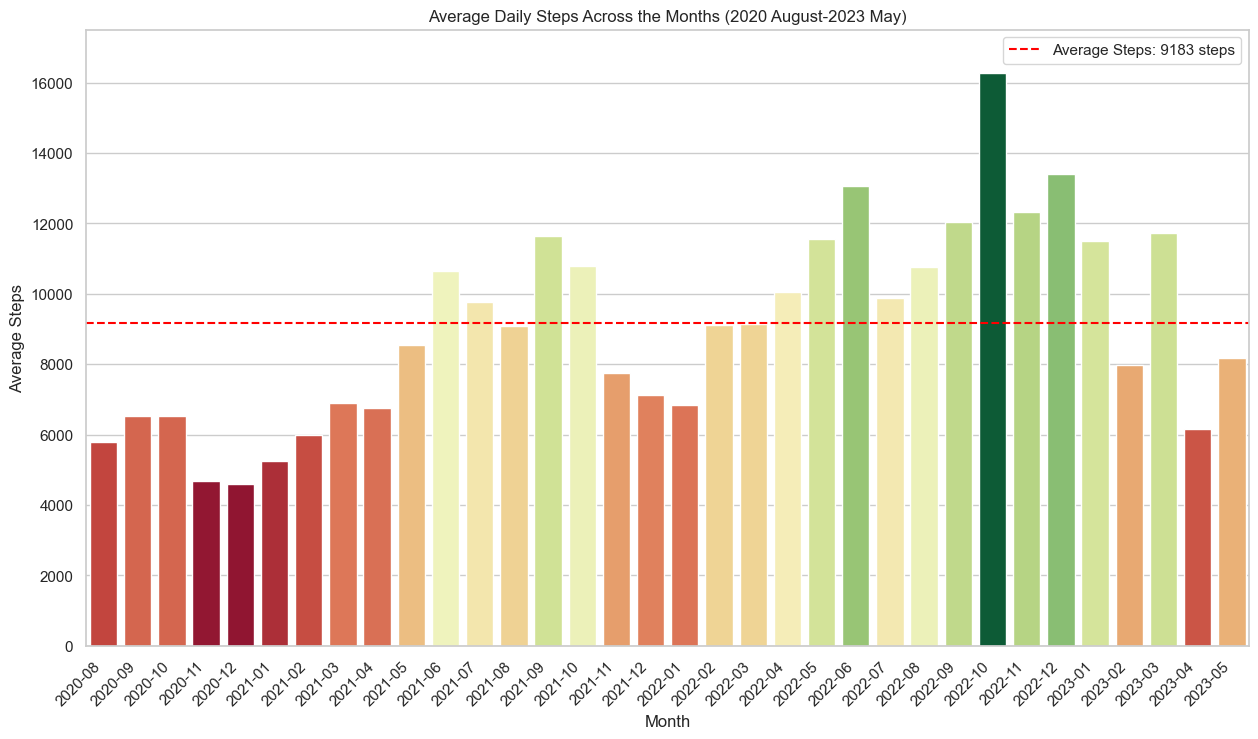

In [28]:
#AVERAGE DAILY STEPS ACROSS THE MONTHS (2020 AUG-2023 MAY)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Assuming df_activity is your DataFrame containing the activity data

# Convert 'date' to datetime type
df_activity['date'] = pd.to_datetime(df_activity['date'])

# Extract month and year from the 'date' column
df_activity['month'] = df_activity['date'].dt.to_period('M')

# Calculate month-wise average total sleep time
monthly_avg_steps = df_activity.groupby('month')['steps'].mean().reset_index()

# Overall average steps
mean_steps = df_activity["steps"].mean()

# Set the style of seaborn
sns.set(style="whitegrid")

# Set the size of the plot
plt.figure(figsize=(15, 8))

# Set 'RdYlGn' as the color map for red tones
color_map = cm.get_cmap('RdYlGn')

# Normalize steps data for darker color for higher bars
normalized_steps = (monthly_avg_steps['steps'] - monthly_avg_steps['steps'].min()) / (monthly_avg_steps['steps'].max() - monthly_avg_steps['steps'].min())

# Create a bar plot with gradient colors
ax = sns.barplot(x='month', y='steps', data=monthly_avg_steps, palette=color_map(normalized_steps))

# Add a horizontal line for the overall average
plt.axhline(mean_steps, color='red', linestyle='--', label=f'Average Steps: {mean_steps:.0f} steps')

# Set y-axis limit to include zero
plt.ylim(0, 17500)

# Set the title and labels
plt.title('Average Daily Steps Across the Months (2020 August-2023 May)')
plt.xlabel('Month')
plt.ylabel('Average Steps')
plt.legend()

# Rotate x-axis labels diagonally
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

***From the bar chart (above) we have the following conclusion(s):***
#
1. Compared with post-pandemic term, i had taken less steps during pandemic.
2. Following 2020 November, there was a noticeable decrease in physical activity. 
3. When controlled normalization began at 2021 March, my step count also increased. 
4. After removing the Covid-19 precautions at 2021 June, there was an increase in step counts.
5. When face-to-face education started at 2021 September, September becomes the month I stepped the most in 2021.
6. Compared with 2021, I was more active in 2022.
7. 2022 was the month I stepped the most on average between 2020 August and 2023 May.


resource: https://www.aa.com.tr/tr/koronavirus/turkiyenin-kovid-19-salginiyla-mucadelesinin-2-yili/2529977

---
#### **2.1.2 Average Daily Steps Across the Months (All Data)**

/var/folders/73/0_w_x4dn5kz24kt1f9s7xzv80000gn/T/ipykernel_50902/1571839878.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('RdYlGn')
/var/folders/73/0_w_x4dn5kz24kt1f9s7xzv80000gn/T/ipykernel_50902/1571839878.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Month', y='Average Steps', data=df_plot, palette=color_map(normalized_steps))
/var/folders/73/0_w_x4dn5kz24kt1f9s7xzv80000gn/T/ipykernel_50902/1571839878.py:56: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x='Month', y='Average Steps', data=df_plot, palette=color_

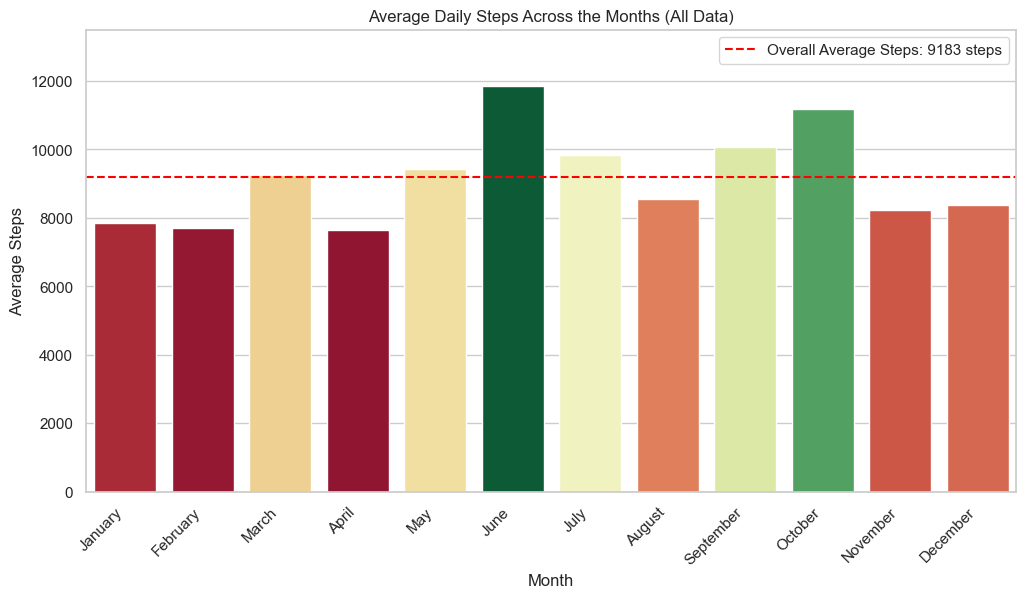

In [29]:
#AVERAGE DAILY STEPS ACROSS THE MONTHS (ALL DATA)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Convert 'date' to datetime type
df_activity['date'] = pd.to_datetime(df_activity['date'])

# Extract month and year from the 'date' column
df_activity['month'] = df_activity['date'].dt.to_period('M')

# Calculate monthly average steps
avg_steps_month_01 = (df_activity[df_activity['month'] == "2021-01"]["steps"].mean() + df_activity[df_activity['month'] == "2022-01"]["steps"].mean() + df_activity[df_activity['month'] == "2023-01"]["steps"].mean()) / 3
avg_steps_month_02 = (df_activity[df_activity['month'] == "2021-02"]["steps"].mean() + df_activity[df_activity['month'] == "2022-02"]["steps"].mean() + df_activity[df_activity['month'] == "2023-02"]["steps"].mean()) / 3
avg_steps_month_03 = (df_activity[df_activity['month'] == "2021-03"]["steps"].mean() + df_activity[df_activity['month'] == "2022-03"]["steps"].mean() + df_activity[df_activity['month'] == "2023-03"]["steps"].mean()) / 3
avg_steps_month_04 = (df_activity[df_activity['month'] == "2021-04"]["steps"].mean() + df_activity[df_activity['month'] == "2022-04"]["steps"].mean() + df_activity[df_activity['month'] == "2023-04"]["steps"].mean()) / 3
avg_steps_month_05 = (df_activity[df_activity['month'] == "2021-05"]["steps"].mean() + df_activity[df_activity['month'] == "2022-05"]["steps"].mean() + df_activity[df_activity['month'] == "2023-05"]["steps"].mean()) / 3
avg_steps_month_06 = (df_activity[df_activity['month'] == "2021-06"]["steps"].mean() + df_activity[df_activity['month'] == "2022-06"]["steps"].mean()) / 2
avg_steps_month_07 = (df_activity[df_activity['month'] == "2021-07"]["steps"].mean() + df_activity[df_activity['month'] == "2022-07"]["steps"].mean()) / 2
avg_steps_month_08 = (df_activity[df_activity['month'] == "2020-08"]["steps"].mean() + df_activity[df_activity['month'] == "2021-08"]["steps"].mean() + df_activity[df_activity['month'] == "2022-08"]["steps"].mean()) / 3
avg_steps_month_09 = (df_activity[df_activity['month'] == "2020-09"]["steps"].mean() + df_activity[df_activity['month'] == "2021-09"]["steps"].mean() + df_activity[df_activity['month'] == "2022-09"]["steps"].mean()) / 3
avg_steps_month_10 = (df_activity[df_activity['month'] == "2020-10"]["steps"].mean() + df_activity[df_activity['month'] == "2021-10"]["steps"].mean() + df_activity[df_activity['month'] == "2022-10"]["steps"].mean()) / 3
avg_steps_month_11 = (df_activity[df_activity['month'] == "2020-11"]["steps"].mean() + df_activity[df_activity['month'] == "2021-11"]["steps"].mean() + df_activity[df_activity['month'] == "2022-11"]["steps"].mean()) / 3
avg_steps_month_12 = (df_activity[df_activity['month'] == "2020-12"]["steps"].mean() + df_activity[df_activity['month'] == "2021-12"]["steps"].mean() + df_activity[df_activity['month'] == "2022-12"]["steps"].mean()) / 3

df_avg_steps_month = [avg_steps_month_01, avg_steps_month_02, avg_steps_month_03, avg_steps_month_04, avg_steps_month_05, avg_steps_month_06, 
                      avg_steps_month_07, avg_steps_month_08, avg_steps_month_09, avg_steps_month_10, avg_steps_month_11, avg_steps_month_12]

# Assuming df_avg_steps_month is a list containing the monthly averages
months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Create a DataFrame for plotting
df_plot = pd.DataFrame({'Month': months, 'Average Steps': df_avg_steps_month})

# Overall average steps
mean_steps = df_activity["steps"].mean()

# Set the style of seaborn
sns.set(style="whitegrid")

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Set 'RdYlGn' as the color map for red tones
color_map = cm.get_cmap('RdYlGn')

# Normalize steps data for darker color for higher bars
normalized_steps = (df_plot['Average Steps'] - df_plot['Average Steps'].min()) / (df_plot['Average Steps'].max() - df_plot['Average Steps'].min())

# Create a bar plot with gradient colors
ax = sns.barplot(x='Month', y='Average Steps', data=df_plot, palette=color_map(normalized_steps))

# Mean line
plt.axhline(mean_steps, color='red', linestyle='--', label=f'Overall Average Steps: {mean_steps:.0f} steps')

# Set y-axis limit
plt.ylim(0, 13500)

# Set the title and labels
plt.title('Average Daily Steps Across the Months (All Data)')
plt.xlabel('Month')
plt.ylabel('Average Steps')
plt.legend()

# Rotate x-axis labels diagonally
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


***From the bar chart (above) we have the following conclusion(s):***
#
1. On average, I take more than 9000 steps in a day. 
2. I am most active in June, which is beginning of the summer.
3. 2nd most active month I am is October, which is coincident with schools open.  
4. I am more active in summer than winter. 

---
#### **2.1.3 Average Daily Steps (Days of the Week)**

/var/folders/73/0_w_x4dn5kz24kt1f9s7xzv80000gn/T/ipykernel_50902/2596107471.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('RdYlGn')
/var/folders/73/0_w_x4dn5kz24kt1f9s7xzv80000gn/T/ipykernel_50902/2596107471.py:38: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x='day_of_week', y='steps', hue='day_of_week', data=daily_avg_steps_all, order=days_order, palette=color_map(normalized_steps_all), legend=False)


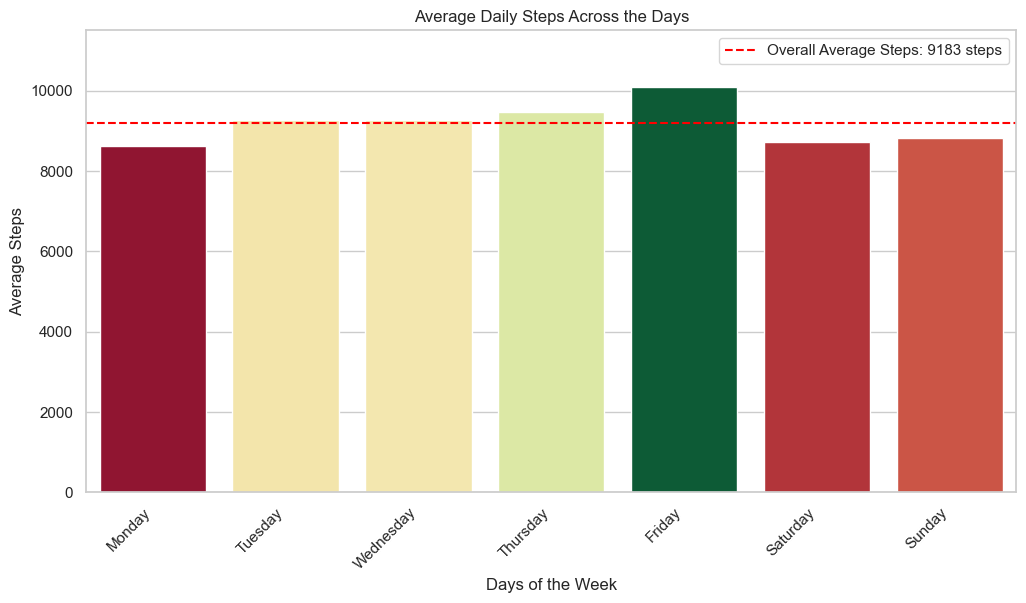

In [30]:
#AVERAGE DAILY STEPS (DAYS OF THE WEEK)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Assuming df_activity is your DataFrame containing the activity data

# Convert 'date' to datetime type
df_activity['date'] = pd.to_datetime(df_activity['date'])

# Extract day of the week from the 'date' column
df_activity['day_of_week'] = df_activity['date'].dt.day_name()

# Specify the order of days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate day-wise average total sleep time for all data
daily_avg_steps_all = df_activity.groupby('day_of_week')['steps'].mean().reindex(days_order).reset_index()

# Overall average steps for all data
mean_steps_all = df_activity["steps"].mean()

# Set the style of seaborn
sns.set(style="whitegrid")

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Set 'RdYlGn' as the color map for red tones
color_map = cm.get_cmap('RdYlGn')

# Normalize steps data for darker color for higher bars
normalized_steps_all = (daily_avg_steps_all['steps'] - daily_avg_steps_all['steps'].min()) / (daily_avg_steps_all['steps'].max() - daily_avg_steps_all['steps'].min())

# Create a bar plot with gradient colors for all data
ax = sns.barplot(x='day_of_week', y='steps', hue='day_of_week', data=daily_avg_steps_all, order=days_order, palette=color_map(normalized_steps_all), legend=False)

# Add a horizontal line for the overall average steps for all data
plt.axhline(mean_steps_all, color='red', linestyle='--', label=f'Overall Average Steps: {mean_steps_all:.0f} steps')


# Set y-axis limit
plt.ylim(0, 11500)

# Set the title and labels
plt.title('Average Daily Steps Across the Days')
plt.xlabel('Days of the Week')
plt.ylabel('Average Steps')
plt.legend()

# Rotate x-axis labels diagonally
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


***From the bar chart (above) we have the following conclusion(s):***
#
1. There is a gradual increase in step count in weekdays. 
2. In weekends, I am generally less active. 
3. Friday is the day that I am physically most active. 

---
#### **2.1.4 Average Steps Across the Hours**

/var/folders/73/0_w_x4dn5kz24kt1f9s7xzv80000gn/T/ipykernel_50902/1381874132.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('RdYlGn')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


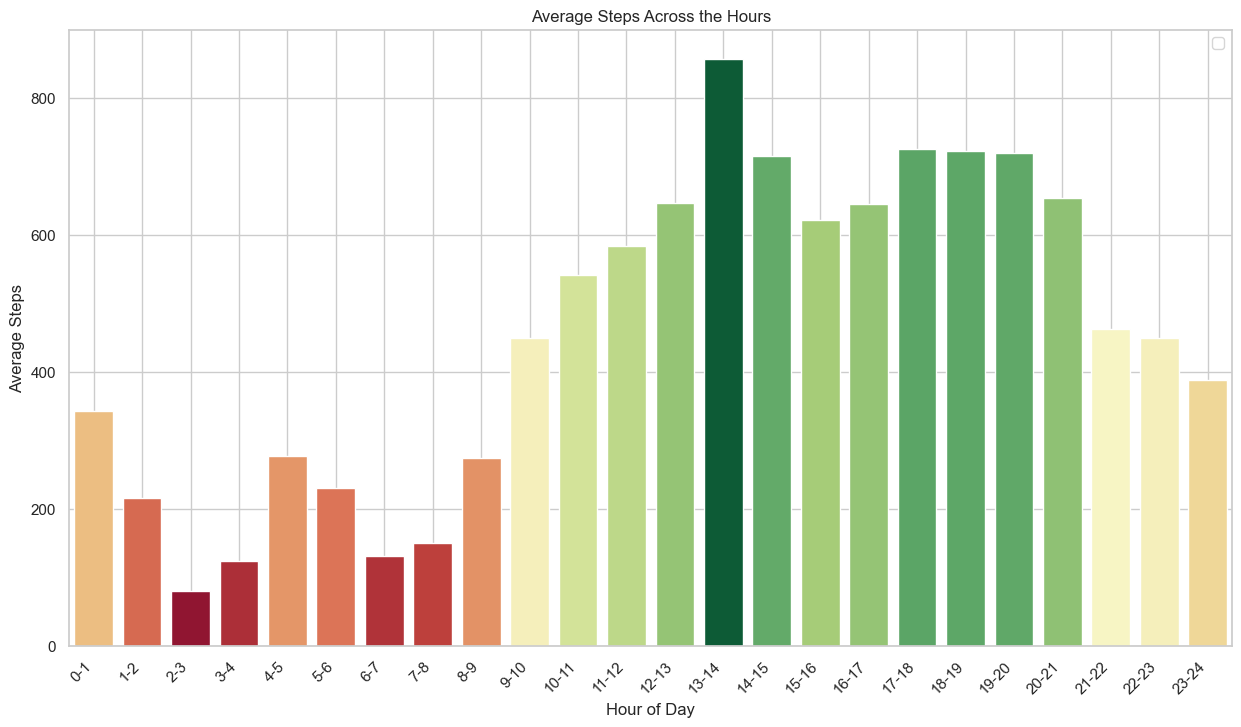

In [31]:
#AVERAGE STEPS ACROSS HOURS

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from ACTIVITY_MINUTE.csv
df = pd.read_csv('ACTIVITY_MINUTE.csv', parse_dates={'datetime': ['date', 'time']})

# Group by date and hour, then sum the steps
daily_hourly_steps = df.groupby([df['datetime'].dt.date, df['datetime'].dt.hour])['steps'].sum()

# Reshape the result to have dates as rows and hours as columns
result = daily_hourly_steps.unstack()

# Calculate the average steps for each hour across all dates
average_hourly_steps = result.mean()

# Set 'RdYlGn' as the color map for red tones
color_map = plt.cm.get_cmap('RdYlGn')

# Normalize steps data in ascending order for darker color for higher bars
normalized_steps = (average_hourly_steps - average_hourly_steps.min()) / (average_hourly_steps.max() - average_hourly_steps.min())

# Plot the data using Seaborn with gradient bars
plt.figure(figsize=(15, 8))

# Assign 'x' variable to 'hue' and set 'legend=False'
bars = sns.barplot(x=average_hourly_steps.index, y=average_hourly_steps, hue=normalized_steps, palette=color_map, legend=False)

# Set x-axis ticks to show hours as 0-1, 1-2, ..., 23-24 and rotate by 45 degrees
hour_labels = [f'{hour}-{hour+1}' for hour in average_hourly_steps.index]
plt.xticks(range(len(hour_labels)), hour_labels, rotation=45, ha='right')

plt.title('Average Steps Across the Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Average Steps')
plt.legend()
plt.grid(True)
plt.show()


***From the bar chart (above) we have the following conclusion(s):***
#
1. I am more active in days than nights. 
2. I step most between 1pm-2pm. 
3. There is a gradual decrease in physical activity during the day starting at 7pm. 

----
#### **2.1.5 Average Steps Across the Quarters of the Day**

/var/folders/73/0_w_x4dn5kz24kt1f9s7xzv80000gn/T/ipykernel_50902/3832014793.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_steps_by_interval = df.groupby(['datetime', 'interval'])['steps'].sum().unstack()
/var/folders/73/0_w_x4dn5kz24kt1f9s7xzv80000gn/T/ipykernel_50902/3832014793.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('RdYlGn')


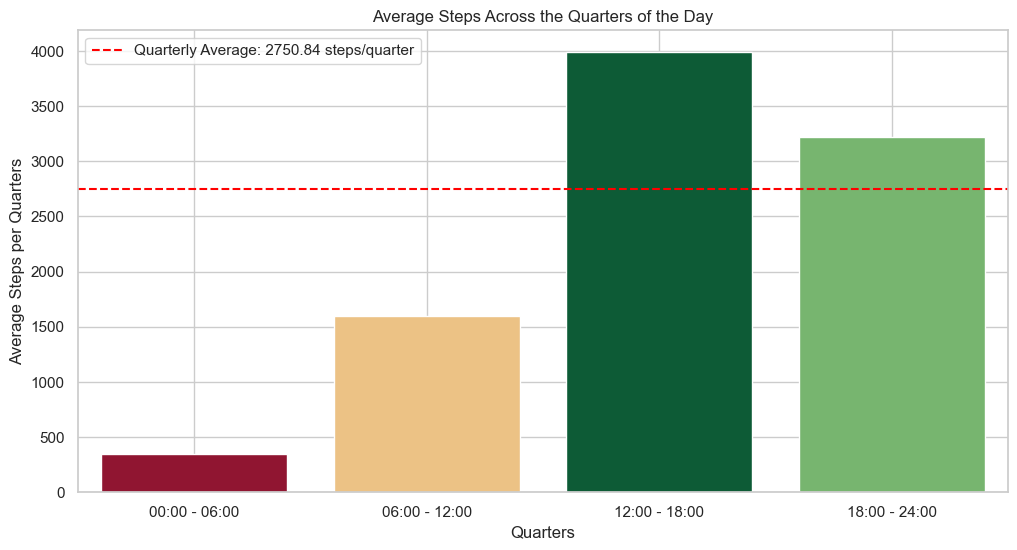

In [32]:
#AVERAGE STEPS ACROSS THE QUARTERS OF THE DAY
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from ACTIVITY_MINUTE.csv
df = pd.read_csv('ACTIVITY_MINUTE.csv', parse_dates={'datetime': ['date', 'time']})

# Create a new column 'interval' based on the time of day
df['interval'] = pd.cut(df['datetime'].dt.hour, bins=[0, 6, 12, 18, 24], labels=['00:00 - 06:00', '06:00 - 12:00', '12:00 - 18:00', '18:00 - 24:00'], right=False)

# Group by date and interval, then sum the steps
total_steps_by_interval = df.groupby(['datetime', 'interval'])['steps'].sum().unstack()

# Calculate the overall average steps
overall_average = df['steps'].mean()

# Calculate the total number of days in the dataset
total_days = df['datetime'].dt.date.nunique()

# Divide the total steps by the total number of days to get the average steps per day
total_steps_by_interval /= total_days

# Set 'RdYlGn' as the color map for red tones
color_map = plt.cm.get_cmap('RdYlGn')

# Normalize steps data in ascending order for darker color for higher bars
normalized_steps = (total_steps_by_interval.sum() - total_steps_by_interval.sum().min()) / (total_steps_by_interval.sum().max() - total_steps_by_interval.sum().min())

# Plot the data using Seaborn with gradient bars
plt.figure(figsize=(12, 6))

# Assign 'x' variable to 'hue' and set 'legend=False'
bars = sns.barplot(x=total_steps_by_interval.columns, y=total_steps_by_interval.sum(), hue=normalized_steps, palette=color_map, dodge=False, legend=False)

quarterly_average = df.groupby([df['datetime'].dt.date, df['datetime'].dt.hour])['steps'].sum().unstack().mean().mean()*6

# Add a horizontal line for the overall average
plt.axhline(y=quarterly_average, color='red', linestyle='--', label=f'Quarterly Average: {quarterly_average:.2f} steps/quarter')

plt.title('Average Steps Across the Quarters of the Day')
plt.xlabel('Quarters')
plt.ylabel('Average Steps per Quarters')
plt.legend()
plt.grid(True)
plt.show()

***From the bar chart (above) we have the following conclusion(s):***
#
1. 12:00 - 18:00 is the quarter that I am most active in a day.

---
#### **2.1.6 Run Distance Ratio Across the Months (All Data)**

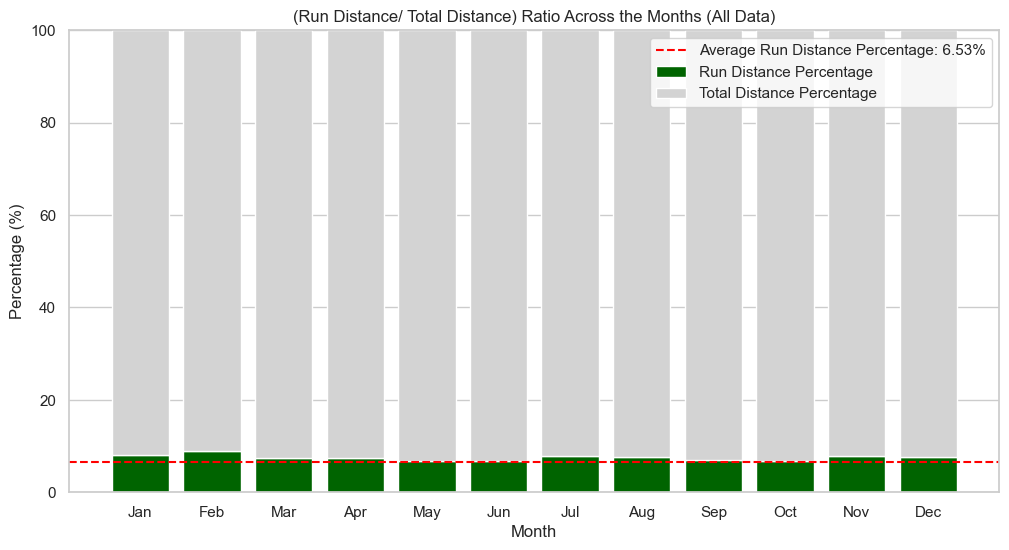

In [33]:
#RUN DISTANCE RATIO ACROSS THE MONTHS (ALL DATA)

import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Load the data from ACTIVITY.csv
df_activity = pd.read_csv('ACTIVITY.csv', parse_dates=['date'])

# Extract month from the 'date' column
df_activity['month'] = df_activity['date'].dt.month

# Calculate the percentage of run distance to total distance
df_activity['run_distance_percentage'] = (df_activity['runDistance'] / df_activity['distance']) * 100

# Set up colors for the bars
colors = ['lightgrey', 'darkgreen']

# Group by month and calculate the mean for each month
monthly_data_activity = df_activity.groupby('month').mean()

# Plot the bar chart
fig, ax2 = plt.subplots(figsize=(12, 6))

# Bar for run distance
ax2.bar(monthly_data_activity.index, monthly_data_activity['run_distance_percentage'], color=colors[1], label='Run Distance Percentage')

# Bar for total distance
ax2.bar(monthly_data_activity.index, 100 - monthly_data_activity['run_distance_percentage'], bottom=monthly_data_activity['run_distance_percentage'],
        color=colors[0], label='Total Distance Percentage')

# Set labels and title
ax2.set_xlabel('Month')
ax2.set_ylabel('Percentage (%)')
ax2.set_title('(Run Distance/ Total Distance) Ratio Across the Months (All Data)')

# Set y-axis limits to show percentages from 0 to 100
ax2.set_ylim(0, 100)

# Add legend
ax2.legend()

# Add custom formatter for month names
month_names_activity = [calendar.month_abbr[i] for i in range(1, 13)]
ax2.set_xticks(monthly_data_activity.index)
ax2.set_xticklabels(month_names_activity)

# Add axhline for the average run distance percentage
average_run_distance_percentage = (df_activity['runDistance'].sum() / df_activity['distance'].sum()) * 100
ax2.axhline(y=average_run_distance_percentage, color='red', linestyle='--', label=f'Average Run Distance Percentage: {average_run_distance_percentage:.2f}%')

# Add legend
ax2.legend()

# Show the plot
plt.show()

***From the bar chart (above) we have the following conclusion(s):***
#
1. In general I take 6.53% of my steps with running. 
2. This shows that, most of the time (94%), I step on an average velocity. This result can also be further used to interpret my personal characteristics, as well :)
3. In Februarys, the average running/walking ratio increases.

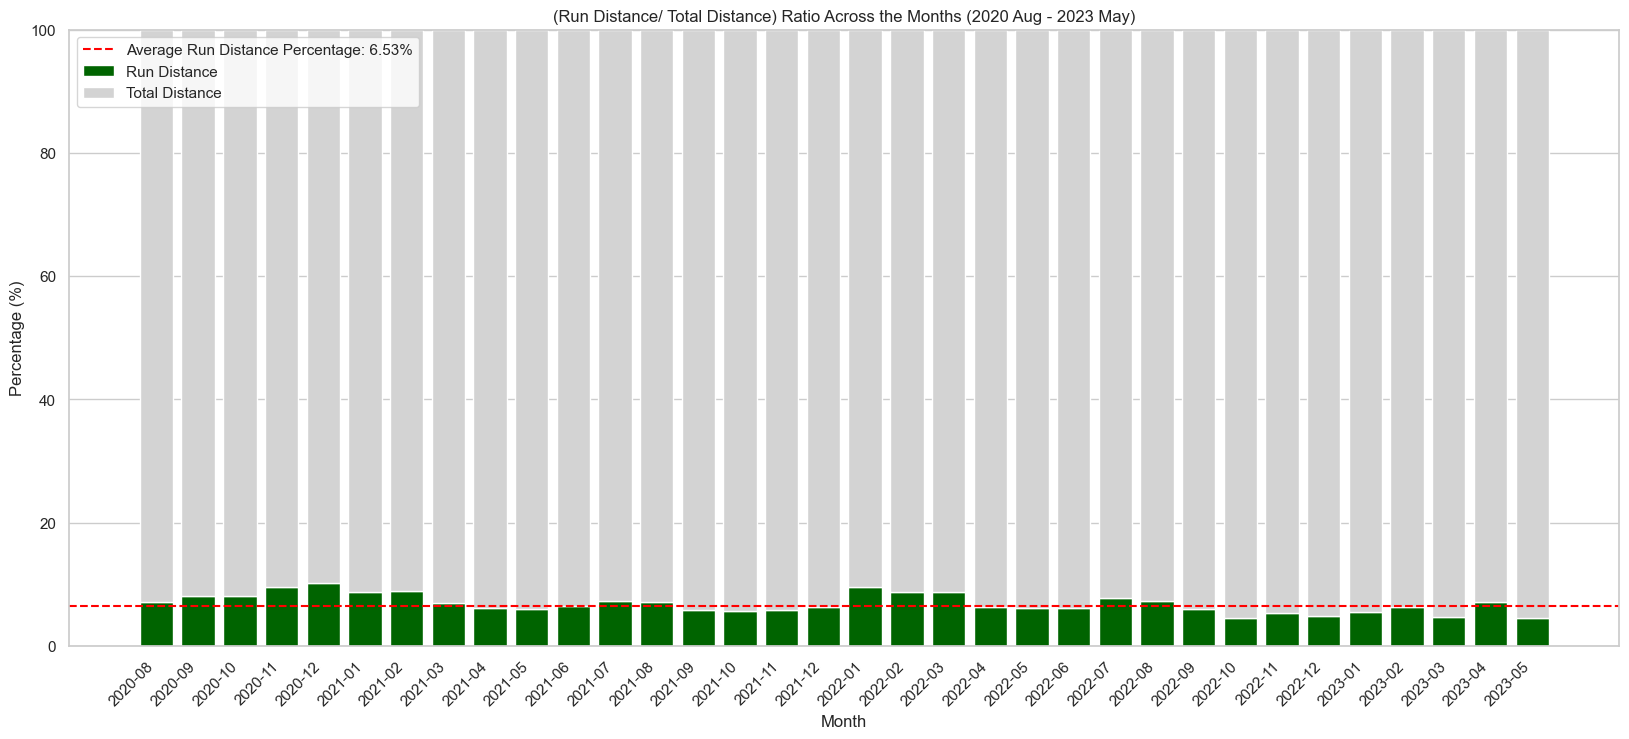

In [34]:
#RUN DISTANCE RATIO ACROSS THE MONTHS (2020 AUG-2023 MAY)

import pandas as pd
import matplotlib.pyplot as plt

# Load the data from ACTIVITY.csv
df_activity = pd.read_csv('ACTIVITY.csv', parse_dates=['date'])

# Extract month from the 'date' column
df_activity['month'] = df_activity['date'].dt.to_period('M')

# Set up colors for the bars
colors = ['lightgrey', 'darkgreen']

# Get unique months from the dataset
unique_months_activity = sorted(df_activity['month'].unique())

# Plot the bar chart for each month
fig, ax2 = plt.subplots(figsize=(20, 8))

for month in unique_months_activity:
    # Filter data for the current month
    month_data_activity = df_activity[df_activity['month'] == month]
    
    # Calculate the mean for the current month
    month_mean_activity = month_data_activity.groupby('month').mean()
    
    # Calculate percentages
    total_distance_percentage = (month_mean_activity['distance'].values[0] / month_mean_activity['distance'].values[0]) * 100
    run_distance_percentage = (month_mean_activity['runDistance'].values[0] / month_mean_activity['distance'].values[0]) * 100
    
    # Bar for run distance
    ax2.bar(str(month), run_distance_percentage, color=colors[1], label='Run Distance' if month == unique_months_activity[0] else '')
    
    # Bar for total distance
    ax2.bar(str(month), total_distance_percentage - run_distance_percentage, bottom=run_distance_percentage,
            color=colors[0], label='Total Distance' if month == unique_months_activity[0] else '')

# Add a horizontal line for the overall average run distance percentage
average_run_distance_percentage = (df_activity['runDistance'].sum() / df_activity['distance'].sum()) * 100
plt.axhline(y=average_run_distance_percentage, color='red', linestyle='--', label=f'Average Run Distance Percentage: {average_run_distance_percentage:.2f}%')

# Set labels and title
ax2.set_xlabel('Month')
ax2.set_ylabel('Percentage (%)')
ax2.set_title('(Run Distance/ Total Distance) Ratio Across the Months (2020 Aug - 2023 May)')

# Set y-axis limits to show percentages from 0 to 100
ax2.set_ylim(0, 100)

# Add legend
ax2.legend(loc='upper left')

# Show the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

---
### **2.2: SLEEP DATA ANALYSIS**


#### **2.2.1 Average Daily Sleep Time Across the Months (2020 Aug-2023 May)**

/var/folders/73/0_w_x4dn5kz24kt1f9s7xzv80000gn/T/ipykernel_50902/3849126883.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('seismic')
/var/folders/73/0_w_x4dn5kz24kt1f9s7xzv80000gn/T/ipykernel_50902/3849126883.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='month', y='totalSleep', data=monthly_avg_sleep, palette=color_map(normalized_sleep_time))
/var/folders/73/0_w_x4dn5kz24kt1f9s7xzv80000gn/T/ipykernel_50902/3849126883.py:36: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x='month', y='totalSleep', data=monthly_avg_s

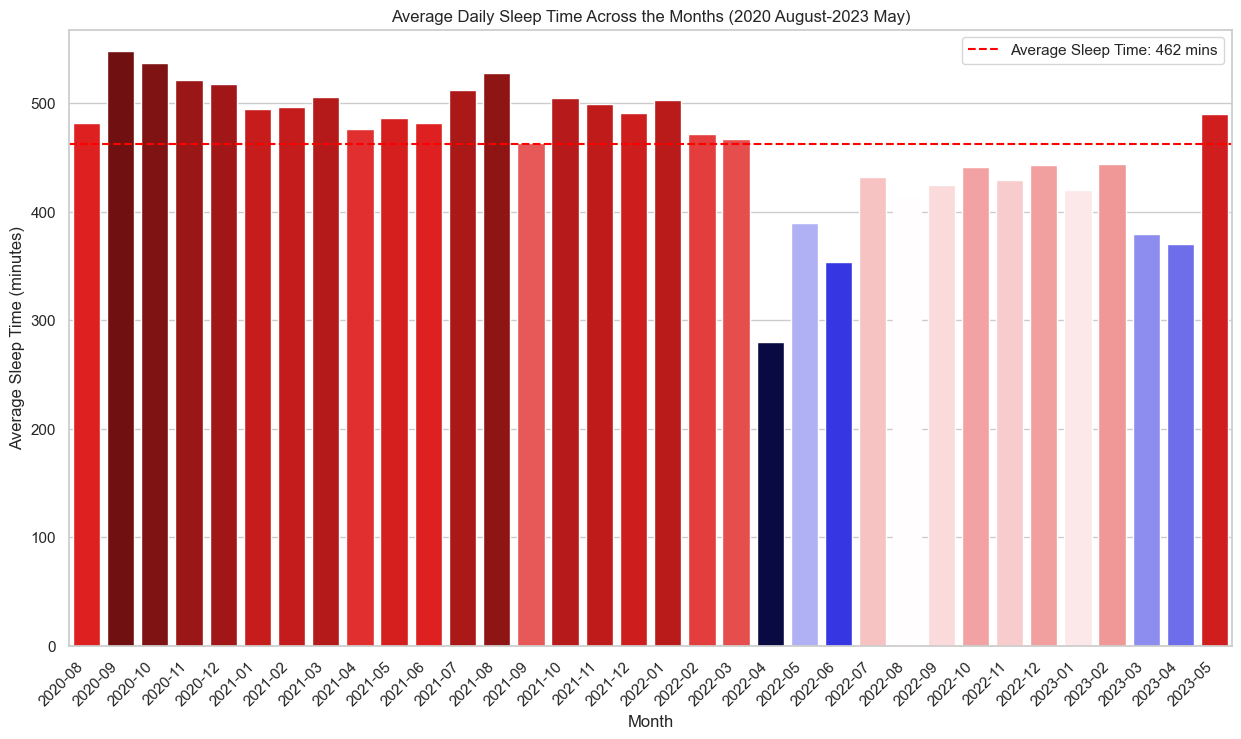

In [35]:
#AVERAGE DAILY SLEEP TIME ACROSS THE MONTHS (2020 AUG-2023 MAY)


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Assuming df_sleep is your DataFrame containing sleep data

# Convert 'date' to datetime type
df_sleep['date'] = pd.to_datetime(df_sleep['date'])

# Extract month and year from the 'date' column
df_sleep['month'] = df_sleep['date'].dt.to_period('M')

# Calculate month-wise average total sleep time
monthly_avg_sleep = df_sleep.groupby('month')['totalSleep'].mean().reset_index()

# Overall average sleep time
mean_sleep_time = df_sleep["totalSleep"].mean()

# Set the style of seaborn
sns.set(style="whitegrid")

# Set the size of the plot
plt.figure(figsize=(15, 8))

# Set 'seismic' as the color map for blue tones
color_map = cm.get_cmap('seismic')

# Normalize sleep time data for darker color for higher bars
normalized_sleep_time = (monthly_avg_sleep['totalSleep'] - monthly_avg_sleep['totalSleep'].min()) / (monthly_avg_sleep['totalSleep'].max() - monthly_avg_sleep['totalSleep'].min())

# Create a bar plot with gradient colors
ax = sns.barplot(x='month', y='totalSleep', data=monthly_avg_sleep, palette=color_map(normalized_sleep_time))

# Add a horizontal line for the overall average sleep time
plt.axhline(mean_sleep_time, color='red', linestyle='--', label=f'Average Sleep Time: {mean_sleep_time:.0f} mins')

# Set y-axis limit
plt.ylim(0, monthly_avg_sleep['totalSleep'].max() + 20)

# Set the title and labels
plt.title('Average Daily Sleep Time Across the Months (2020 August-2023 May)')
plt.xlabel('Month')
plt.ylabel('Average Sleep Time (minutes)')
plt.legend()

# Rotate x-axis labels diagonally
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


***From the bar chart (above) we have the following conclusion(s):***
#
1. Between 2020 September and 2020 December my sleep time was comparebly high. This term coincidents with the quarantine precautions implied for the young people under 20s. 
2. Following 2022 April, my average sleep time were under the overall average. This term is coincident with the rest of my academic career of the second term of the Freashman year. Hence, the reason for decrease in sleep time might be the academic challenges :) (Since the data covers only first few days of the 2023 May, increase in average sleep time on May cannot solely disprove the hypothesis :)

resource: https://www.aa.com.tr/tr/koronavirus/turkiyenin-kovid-19-salginiyla-mucadelesinin-2-yili/2529977

---
#### **2.2.2 Average Daily Sleep Time Across the Months (All Data)**

/var/folders/73/0_w_x4dn5kz24kt1f9s7xzv80000gn/T/ipykernel_50902/374663620.py:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('seismic')
/var/folders/73/0_w_x4dn5kz24kt1f9s7xzv80000gn/T/ipykernel_50902/374663620.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Month', y='Average totalSleep', data=df_plot, palette=color_map(normalized_sleep))
/var/folders/73/0_w_x4dn5kz24kt1f9s7xzv80000gn/T/ipykernel_50902/374663620.py:57: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x='Month', y='Average totalSleep', data=df_plot, palett

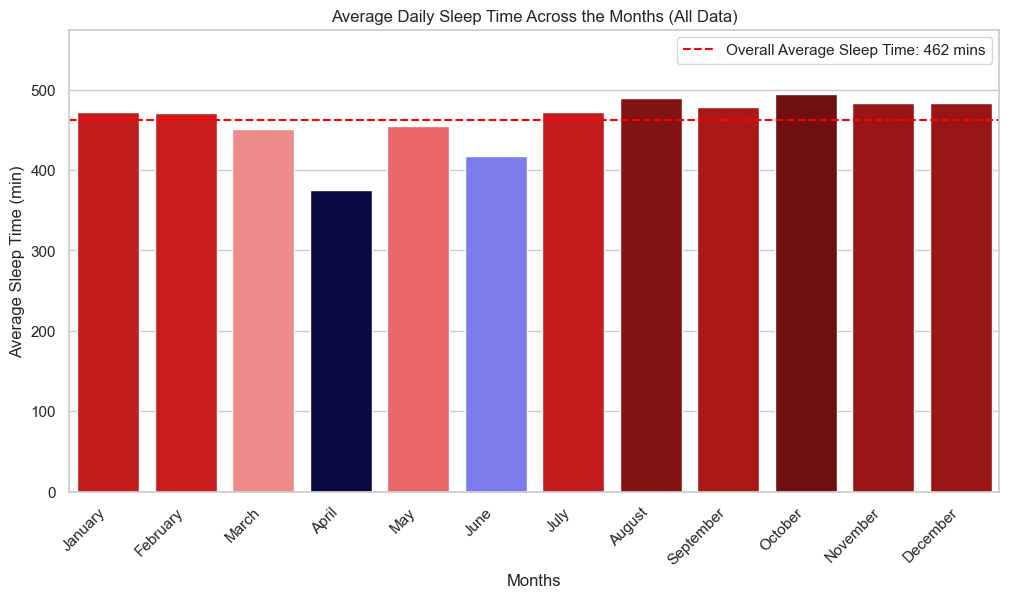

In [36]:
#AVERAGE DAILY SLEEP TIME ACROSS THE MONTHS (ALL DATA)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Assuming df_merged is your DataFrame containing the sleep data

# Convert 'date' to datetime type
df_merged['date'] = pd.to_datetime(df_merged['date'])

# Extract month and year from the 'date' column
df_merged['month'] = df_merged['date'].dt.to_period('M')

# Calculate monthly average total sleep time
avg_sleep_month_01 = (df_merged[df_merged['month'] == "2021-01"]["totalSleep"].mean() + df_merged[df_merged['month'] == "2022-01"]["totalSleep"].mean() + df_merged[df_merged['month'] == "2023-01"]["totalSleep"].mean()) / 3
avg_sleep_month_02 = (df_merged[df_merged['month'] == "2021-02"]["totalSleep"].mean() + df_merged[df_merged['month'] == "2022-02"]["totalSleep"].mean() + df_merged[df_merged['month'] == "2023-02"]["totalSleep"].mean()) / 3
avg_sleep_month_03 = (df_merged[df_merged['month'] == "2021-03"]["totalSleep"].mean() + df_merged[df_merged['month'] == "2022-03"]["totalSleep"].mean() + df_merged[df_merged['month'] == "2023-03"]["totalSleep"].mean()) / 3
avg_sleep_month_04 = (df_merged[df_merged['month'] == "2021-04"]["totalSleep"].mean() + df_merged[df_merged['month'] == "2022-04"]["totalSleep"].mean() + df_merged[df_merged['month'] == "2023-04"]["totalSleep"].mean()) / 3
avg_sleep_month_05 = (df_merged[df_merged['month'] == "2021-05"]["totalSleep"].mean() + df_merged[df_merged['month'] == "2022-05"]["totalSleep"].mean() + df_merged[df_merged['month'] == "2023-05"]["totalSleep"].mean()) / 3
avg_sleep_month_06 = (df_merged[df_merged['month'] == "2021-06"]["totalSleep"].mean() + df_merged[df_merged['month'] == "2022-06"]["totalSleep"].mean()) / 2
avg_sleep_month_07 = (df_merged[df_merged['month'] == "2021-07"]["totalSleep"].mean() + df_merged[df_merged['month'] == "2022-07"]["totalSleep"].mean()) / 2
avg_sleep_month_08 = (df_merged[df_merged['month'] == "2020-08"]["totalSleep"].mean() + df_merged[df_merged['month'] == "2021-08"]["totalSleep"].mean() + df_merged[df_merged['month'] == "2022-08"]["totalSleep"].mean()) / 3
avg_sleep_month_09 = (df_merged[df_merged['month'] == "2020-09"]["totalSleep"].mean() + df_merged[df_merged['month'] == "2021-09"]["totalSleep"].mean() + df_merged[df_merged['month'] == "2022-09"]["totalSleep"].mean()) / 3
avg_sleep_month_10 = (df_merged[df_merged['month'] == "2020-10"]["totalSleep"].mean() + df_merged[df_merged['month'] == "2021-10"]["totalSleep"].mean() + df_merged[df_merged['month'] == "2022-10"]["totalSleep"].mean()) / 3
avg_sleep_month_11 = (df_merged[df_merged['month'] == "2020-11"]["totalSleep"].mean() + df_merged[df_merged['month'] == "2021-11"]["totalSleep"].mean() + df_merged[df_merged['month'] == "2022-11"]["totalSleep"].mean()) / 3
avg_sleep_month_12 = (df_merged[df_merged['month'] == "2020-12"]["totalSleep"].mean() + df_merged[df_merged['month'] == "2021-12"]["totalSleep"].mean() + df_merged[df_merged['month'] == "2022-12"]["totalSleep"].mean()) / 3

df_avg_sleep_month = [avg_sleep_month_01, avg_sleep_month_02, avg_sleep_month_03, avg_sleep_month_04, avg_sleep_month_05, avg_sleep_month_06, 
                      avg_sleep_month_07, avg_sleep_month_08, avg_sleep_month_09, avg_sleep_month_10, avg_sleep_month_11, avg_sleep_month_12]

months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Create a DataFrame for plotting
df_plot = pd.DataFrame({'Month': months, 'Average totalSleep': df_avg_sleep_month})

# Overall average sleep time
mean_sleep_time = df_merged["totalSleep"].mean()

# Set the style of seaborn
sns.set(style="whitegrid")

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Set 'seismic' as the color map for blue tones
color_map = cm.get_cmap('seismic')

# Normalize sleep data for darker color for higher bars
normalized_sleep = (df_plot['Average totalSleep'] - df_plot['Average totalSleep'].min()) / (df_plot['Average totalSleep'].max() - df_plot['Average totalSleep'].min())

# Create a bar plot with gradient colors
ax = sns.barplot(x='Month', y='Average totalSleep', data=df_plot, palette=color_map(normalized_sleep))

# Mean line
plt.axhline(mean_sleep_time, color='red', linestyle='--', label=f'Overall Average Sleep Time: {mean_sleep_time:.0f} mins')

# Set y-axis limit
plt.ylim(0, df_plot['Average totalSleep'].max() + 80)

# Set the title and labels
plt.title('Average Daily Sleep Time Across the Months (All Data)')
plt.xlabel('Months')
plt.ylabel('Average Sleep Time (min)')
plt.legend()

# Rotate x-axis labels diagonally
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


***From the bar chart (above) we have the following conclusion(s):***
#
1. On average, I sleep 462 minutes (7 hours 42 mins) in a day. 
2. I sleep most at Octobers, which is the 2nd month I am most active, in general.
3. In summer months I sleep less then winter months. This may be relecant with the difference between day time in summers and winters. 
4. I sleep least at Aprils, which is the month that I am least active, in general. 
5. Article 2 and 4 led me to produce hypothesis, "the more active I am in day, I sleep more". However, as can be seen from the correlation heatmap at the beginning, there is not a direct correlation between the total sleep time and physical activity. 

---
#### **2.2.3 Average Daily Sleep Time Across the Days of the Week**

/var/folders/73/0_w_x4dn5kz24kt1f9s7xzv80000gn/T/ipykernel_50902/3253288263.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('seismic')
/var/folders/73/0_w_x4dn5kz24kt1f9s7xzv80000gn/T/ipykernel_50902/3253288263.py:38: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x='day_of_week', y='totalSleep', hue='day_of_week', data=daily_avg_sleep_all, order=days_order, palette=color_map(normalized_sleep_all), legend=False)


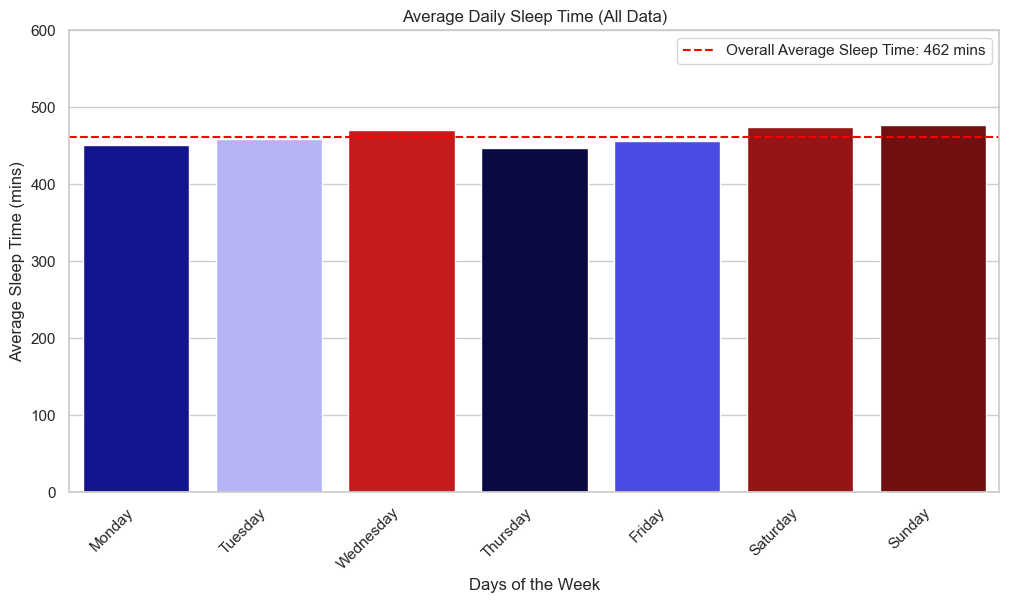

In [37]:
#AVERAGE DAILY SLEEP TIME (DAYS OF THE WEEK)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Assuming df_sleep is your DataFrame containing the sleep data

# Convert 'date' to datetime type
df_sleep['date'] = pd.to_datetime(df_sleep['date'])

# Extract day of the week from the 'date' column
df_sleep['day_of_week'] = df_sleep['date'].dt.day_name()

# Specify the order of days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate day-wise average total sleep time for all data
daily_avg_sleep_all = df_sleep.groupby('day_of_week')['totalSleep'].mean().reindex(days_order).reset_index()

# Overall average sleep time for all data
mean_sleep_all = df_sleep["totalSleep"].mean()

# Set the style of seaborn
sns.set(style="whitegrid")

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Set 'seismic' as the color map for blue tones
color_map = cm.get_cmap('seismic')

# Normalize sleep data for darker color for higher bars
normalized_sleep_all = (daily_avg_sleep_all['totalSleep'] - daily_avg_sleep_all['totalSleep'].min()) / (daily_avg_sleep_all['totalSleep'].max() - daily_avg_sleep_all['totalSleep'].min())

# Create a bar plot with gradient colors for all data
ax = sns.barplot(x='day_of_week', y='totalSleep', hue='day_of_week', data=daily_avg_sleep_all, order=days_order, palette=color_map(normalized_sleep_all), legend=False)

# Add a horizontal line for the overall average sleep time for all data
plt.axhline(mean_sleep_all, color='red', linestyle='--', label=f'Overall Average Sleep Time: {mean_sleep_all:.0f} mins')

# Set y-axis limit
plt.ylim(0, 600)  # Assuming max sleep time is 600 mins

# Set the title and labels
plt.title('Average Daily Sleep Time (All Data)')
plt.xlabel('Days of the Week')
plt.ylabel('Average Sleep Time (mins)')

# Rotate x-axis labels diagonally
plt.xticks(rotation=45, ha='right')
plt.legend()

# Show the plot
plt.show()

***From the bar chart (above) we have the following conclusion(s):***
#
1. I sleep more on weekends than weekdays. 
2. I sleep the most on Sunday. 

---
#### **2.2.4 Deep Sleep Time Ratio Across the Months (2020 Aug-2023 May)**

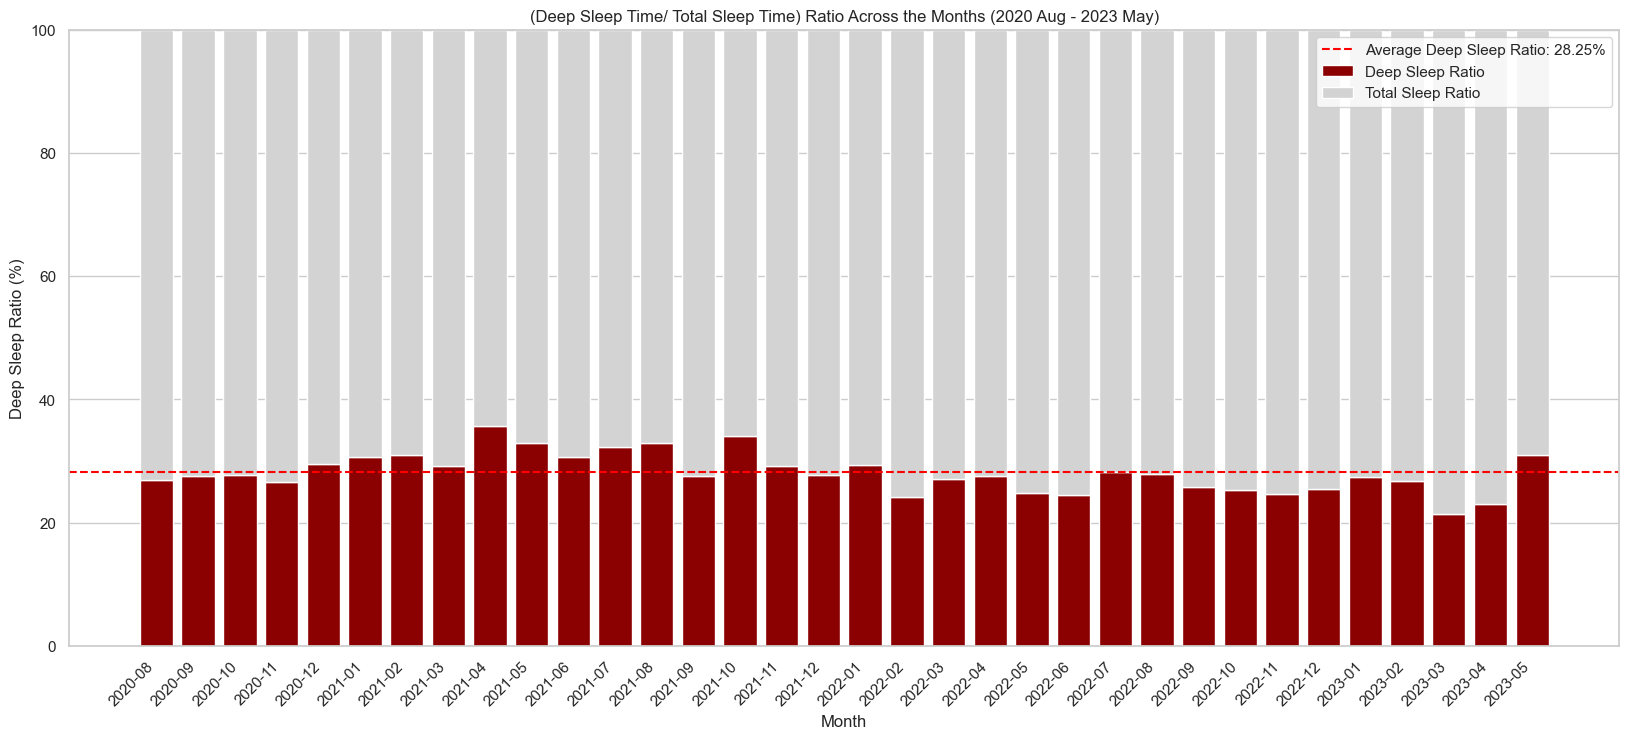

In [38]:
#DEEP SLEEP TIME RATIO ACROSS THE MONTHS (2020 AUG-2023 MAY)

import pandas as pd
import matplotlib.pyplot as plt

# Load the data from SLEEP.csv
df = pd.read_csv('SLEEP.csv', parse_dates=['date', 'start', 'stop'])

# Extract month from the 'date' column
df['month'] = df['date'].dt.to_period('M')

# Calculate the ratio of deep sleep to total sleep
df['deep_sleep_ratio'] = df['deepSleepTime'] / df['totalSleep']

# Set up colors for the bars
colors = ['lightgrey', 'darkred']

# Get unique months from the dataset
unique_months = sorted(df['month'].unique())

# Plot the bar chart for each month
fig, ax1 = plt.subplots(figsize=(20, 8))

for month in unique_months:
    # Filter data for the current month
    month_data = df[df['month'] == month]
    
    # Calculate the mean for the current month
    month_mean = month_data.groupby('month').mean()
    
    # Bar for deep sleep
    ax1.bar(str(month), month_mean['deep_sleep_ratio'].values[0] * 100, color=colors[1], label='Deep Sleep Ratio' if month == unique_months[0] else '')
    
    # Bar for total sleep
    ax1.bar(str(month), (1 - month_mean['deep_sleep_ratio'].values[0]) * 100, bottom=month_mean['deep_sleep_ratio'].values[0] * 100,
            color=colors[0], label='Total Sleep Ratio' if month == unique_months[0] else '')


# Add a horizontal line for the overall average deep sleep time
deep_sleep_ratio_mean = df['deep_sleep_ratio'].mean()*100
plt.axhline(y=deep_sleep_ratio_mean, color='red', linestyle='--', label=f'Average Deep Sleep Ratio: {deep_sleep_ratio_mean:.2f}%')

# Set labels and title
ax1.set_xlabel('Month')
ax1.set_ylabel('Deep Sleep Ratio (%)')
ax1.set_title('(Deep Sleep Time/ Total Sleep Time) Ratio Across the Months (2020 Aug - 2023 May)')

# Set y-axis limits to show percentages from 0 to 100
ax1.set_ylim(0, 100)

# Add legend
ax1.legend()

# Show the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


***From the bar chart (above) we have the following conclusion(s):***
#
1. On average, deep sleep time corresponds to the 28.25% of the total sleep time, which is about the one third. 
2. Starting from 2022 Fevruary, deep sleep time ratio is below the average, in general. 

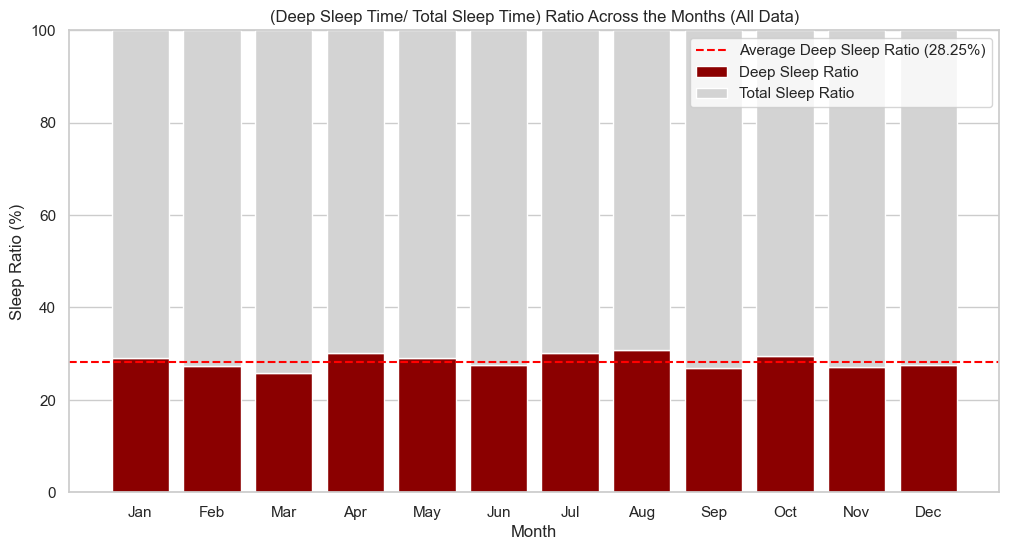

In [39]:
#DEEP SLEEP TIME RATIO ACROSS THE MONTHS (ALL DATA)

import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Load the data from SLEEP.csv
df = pd.read_csv('SLEEP.csv', parse_dates=['date', 'start', 'stop'])

# Extract month from the 'date' column
df['month'] = df['date'].dt.month

# Calculate the ratio of deep sleep to total sleep
df['deep_sleep_ratio'] = df['deepSleepTime'] / df['totalSleep']

# Set up colors for the bars
colors = ['lightgrey', 'darkred']

# Group by month and calculate the mean for each month
monthly_data = df.groupby('month').mean()

# Plot the bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar for deep sleep
ax1.bar(monthly_data.index, monthly_data['deep_sleep_ratio'] * 100, color=colors[1], label='Deep Sleep Ratio')

# Bar for total sleep
ax1.bar(monthly_data.index, (1 - monthly_data['deep_sleep_ratio']) * 100, bottom=monthly_data['deep_sleep_ratio'] * 100,
        color=colors[0], label='Total Sleep Ratio')

# Set labels and title
ax1.set_xlabel('Month')
ax1.set_ylabel('Sleep Ratio (%)')
ax1.set_title('(Deep Sleep Time/ Total Sleep Time) Ratio Across the Months (All Data)')

# Set y-axis limits to show percentages from 0 to 100
ax1.set_ylim(0, 100)

# Add legend
ax1.legend()

# Add custom formatter for month names
month_names = [calendar.month_abbr[i] for i in range(1, 13)]
ax1.set_xticks(monthly_data.index)
ax1.set_xticklabels(month_names)

# Add axhline for the average deep sleep ratio
average_ratio = df['deep_sleep_ratio'].mean() * 100
ax1.axhline(y=average_ratio, color='red', linestyle='--', label=f'Average Deep Sleep Ratio ({average_ratio:.2f}%)')

# Add legend
ax1.legend()

# Show the plot
plt.show()
